In [48]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np

In [42]:
"""
Data loading
"""

df =pd.read_csv('gbm-data.csv')
y = df.iloc[:,0]
X = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=241)

In [43]:
"""
GB model fitting
"""
base = {}
for val in [1.0, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=val, verbose=True)
    gbc.fit(X_train, y_train)
    ans_train = gbc.staged_predict_proba(X_train)
    ans_test = gbc.staged_predict_proba(X_test)
    ll_train = []
    ll_test = []
    for ans_current_iter in ans_train:
        ll_train.append(log_loss(y_train, ans_current_iter))
    for ans_current_iter in ans_test:
        ll_test.append(log_loss(y_test, ans_current_iter))
        
    base[val] = {"train" : ll_train, "test" : ll_test}

      Iter       Train Loss   Remaining Time 
         1           1.0190            9.96s
         2           0.9192            9.92s
         3           0.8272           10.00s
         4           0.7834            9.93s
         5           0.7109           10.26s
         6           0.6368           10.30s
         7           0.5797           10.18s
         8           0.5610           10.08s
         9           0.5185           10.00s
        10           0.4984            9.93s
        20           0.1999            9.36s
        30           0.1313            8.93s
        40           0.0790            8.48s
        50           0.0511            8.12s
        60           0.0352            7.75s
        70           0.0245            7.45s
        80           0.0162            7.00s
        90           0.0114            6.54s
       100           0.0077            6.19s
       200           0.0002            2.02s
      Iter       Train Loss   Remaining Time 
        

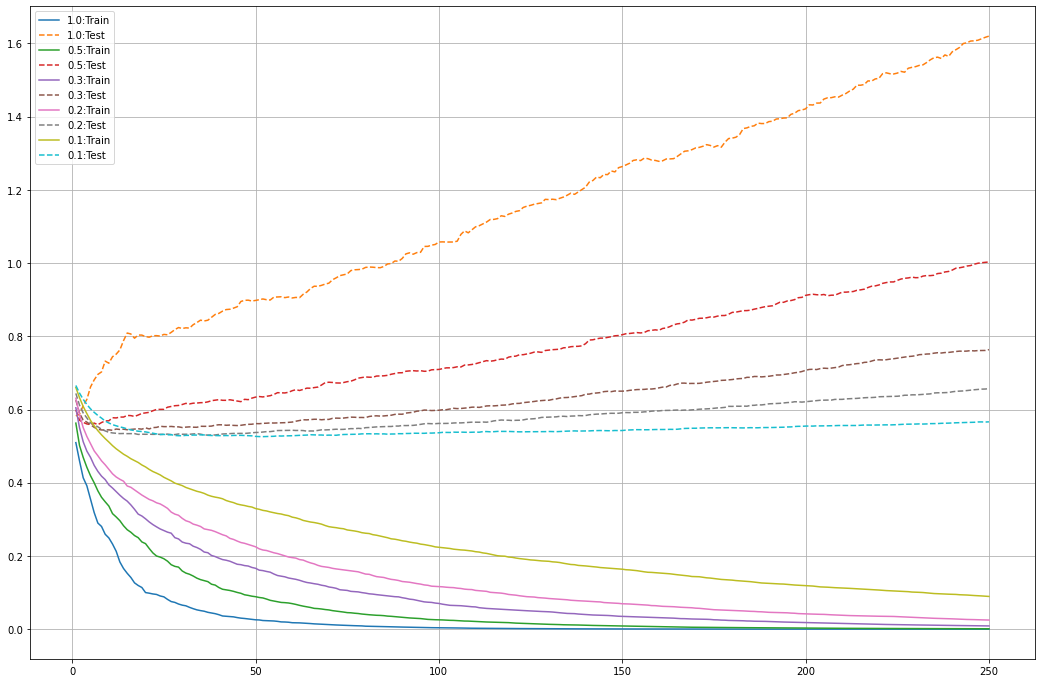

In [44]:
import matplotlib.pyplot as plt 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12
for c, data in base.items():
    Y_train_plot, X_train_plot = data["train"], np.arange(1, len(data["train"]) + 1)
    plt.plot(X_train_plot, Y_train_plot, label =f'{c}:Train')
    Y_test_plot, X_test_plot = data["test"], np.arange(1, len(data["test"]) + 1)
    plt.plot(X_test_plot, Y_test_plot, label =f'{c}:Test', linestyle='dashed')
    plt.grid()
    plt.legend()
plt.show()
    

In [47]:
min_val = min(base[0.2]["test"])
itrs = base[0.2]["test"].index(min_val) + 1
with open("w5s3.txt" , "w") as fhand:
    fhand.write(str(np.round(min_val, decimals=2)) + " " + str(itrs))

In [52]:
"""
RandomForest classifier
"""
rf = RandomForestClassifier(n_estimators=3000, random_state=241)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)
val = log_loss(y_test, pred)

with open('w5s4.txt', 'w') as fhand:
    fhand.write(str(np.round(val, decimals=2)))